## **<u>Multiple Correspondence Analysis (MCA)</u>**  ##

- Subset of PCA
- Use Multiple Correspondence Analysis (MCA) for Categorical data

### **<u>Tutorial Videos</u>** ###
- How it works?: https://youtu.be/5vgP05YpKdE?si=r14pRvvXkhheQex4
- The math behind it: https://youtu.be/fkf4IBRSeEc?si=PxAdZ_9Cc3zVVV6Q

### **<u>Code reference from Kaggle</u>** ###
- https://www.kaggle.com/code/jiagengchang/heart-disease-multiple-correspondence-analysis

In [8]:
import pandas as pd

df = pd.read_csv('../data/cleaned_data.csv')

df.drop(columns=['Respondent ID', 'Customisation Budget Ordinal', 'Personalisation Budget Ordinal'], inplace=True)
df['Total exterior parts to customise'] = df.apply(lambda row: len(row['Exterior components to customise'].split(';')), axis=1)
df['Total interior parts to customise'] = df.apply(lambda row: len(row['Interior components to customise'].split(';')), axis=1)
df['Total factors to buy car'] = df.apply(lambda row: len(row['Deciding factors to buy car'].split(';')), axis=1)


df.head(1)

,Age group,Gender,Category,Marital status,Deciding factors to buy car,Likelihood of customised vehicle if FOC,Exterior components to customise,Interior components to customise,Customisation Budget,Interest in personalising car,Personalisation Budget,Any cadding experience,Singaporean design idea feedback,Total exterior parts to customise,Total interior parts to customise,Total factors to buy car
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size;Customisable options,Very likely,Grilles,Centre compartment,under 500,Only with professional help,500-1000,"No, I would need a designer to model my sketch",-,1,1,4


In [9]:
numcols = df.select_dtypes(['number']).columns
catcols = df.select_dtypes(['object']).columns

print(numcols, catcols, sep='\n\n')

Index(['Total exterior parts to customise',
       'Total interior parts to customise', 'Total factors to buy car'],
      dtype='object')

Index(['Age group', 'Gender', 'Category', 'Marital status',
       'Deciding factors to buy car',
       'Likelihood of customised vehicle if FOC',
       'Exterior components to customise', 'Interior components to customise',
       'Customisation Budget', 'Interest in personalising car',
       'Personalisation Budget', 'Any cadding experience',
       'Singaporean design idea feedback'],
      dtype='object')


In [10]:
df[catcols] = df[catcols].astype('category')
df.drop(columns=['Exterior components to customise', 'Interior components to customise', 'Deciding factors to buy car'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Age group                                50 non-null     category
 1   Gender                                   50 non-null     category
 2   Category                                 50 non-null     category
 3   Marital status                           50 non-null     category
 4   Likelihood of customised vehicle if FOC  50 non-null     category
 5   Customisation Budget                     50 non-null     category
 6   Interest in personalising car            50 non-null     category
 7   Personalisation Budget                   50 non-null     category
 8   Any cadding experience                   50 non-null     category
 9   Singaporean design idea feedback         50 non-null     category
 10  Total exterior parts to customise       

### **<u>Discrete features for MCA</u>** ###

- Age group
- Gender   
- Category 
- Marital status                         
- Likelihood of customised vehicle if FOC    
- Customisation Budget                   
- Interest in personalising car          
- Personalisation Budget                 
- Any cadding experience                 
- Singaporean design idea feedback  

### **<u>Continuous features for PCA</u>** ###

- Total exterior parts to customise
- Total interior parts to customise
- Total factors to buy car

In [11]:
pca_cols = df.select_dtypes(['number']).columns
print(len(pca_cols), 'features used for PCA are', pca_cols.tolist())

mca_cols = df.select_dtypes(['category']).columns
print(len(mca_cols), 'features used for MCA are', mca_cols.tolist())

3 features used for PCA are ['Total exterior parts to customise', 'Total interior parts to customise', 'Total factors to buy car']
10 features used for MCA are ['Age group', 'Gender', 'Category', 'Marital status', 'Likelihood of customised vehicle if FOC', 'Customisation Budget', 'Interest in personalising car', 'Personalisation Budget', 'Any cadding experience', 'Singaporean design idea feedback']


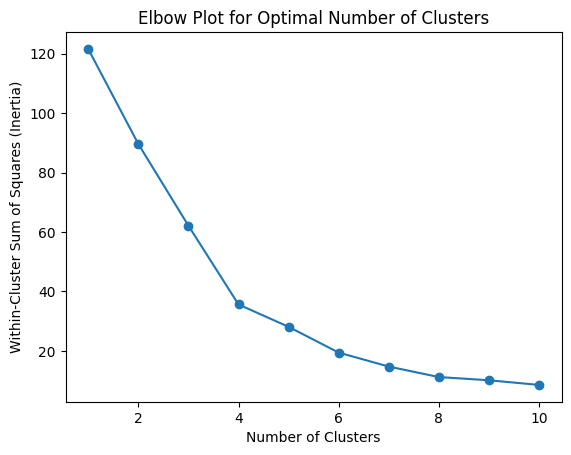

Explained Variance Ratios:
[0.52024524 0.29059548]
Cumulative Explained Variance:
[0.52024524 0.81084072]


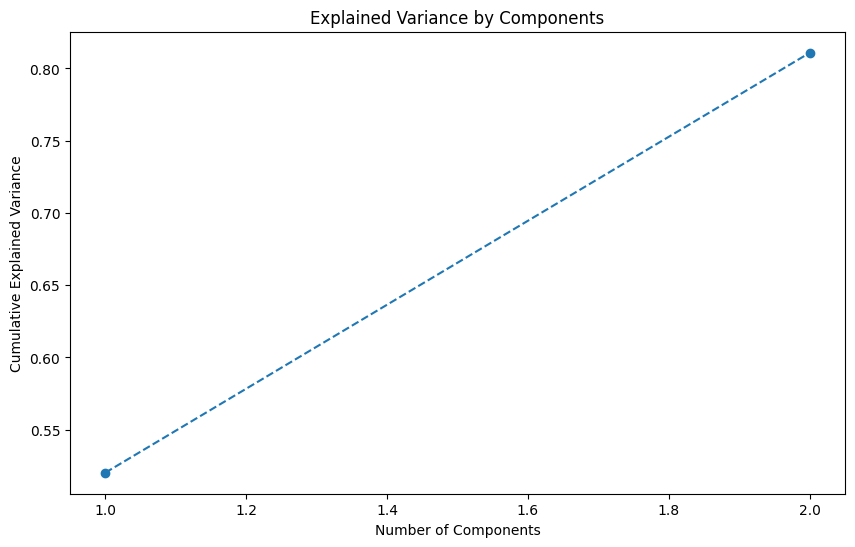

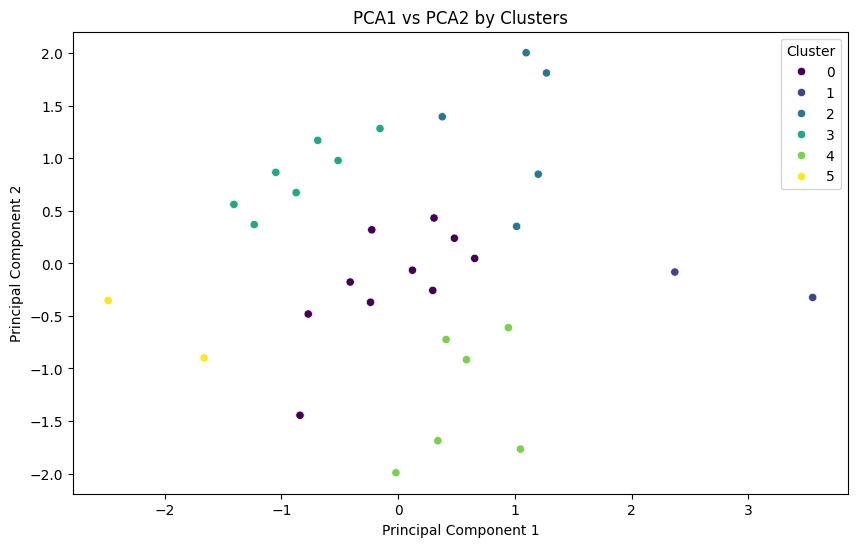

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

scaler = StandardScaler()
pca = PCA(n_components=2)

# Fit and transform the data with PCA
df[pca_cols] = scaler.fit_transform(df[pca_cols])
pca_result = pca.fit_transform(df[pca_cols])

# Elbow plot to determine the optimal number of clusters
inertia_values = []
for i in range(1, 11):  # Trying clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_result)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow plot
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.show()

# Choose the number of clusters (k) and fit KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster_label'] = kmeans.fit_predict(pca_result[:, :2]) 

# Print explained variance ratios
print("Explained Variance Ratios:")
print(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:")
print(pca.explained_variance_ratio_.cumsum())

# Plot Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Plot PCA1 vs PCA2
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['cluster_label'], palette='viridis')
plt.title('PCA1 vs PCA2 by Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

### **MCA**

MCA FACTORS: Index(['Age group', 'Gender', 'Category', 'Marital status',
       'Likelihood of customised vehicle if FOC', 'Customisation Budget',
       'Interest in personalising car', 'Personalisation Budget',
       'Any cadding experience', 'Singaporean design idea feedback'],
      dtype='object')



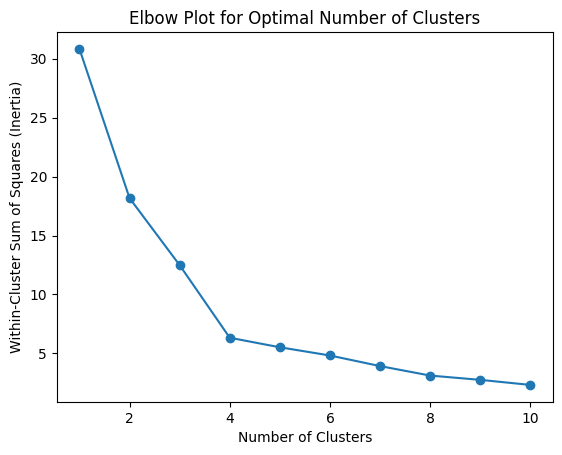

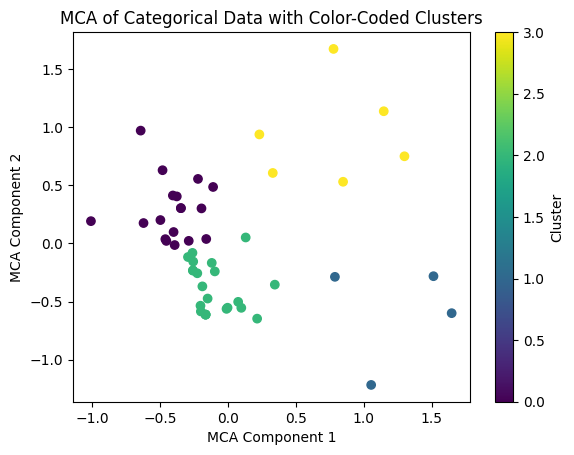

Cluster Profiles:
        Age group  Gender                                           Category  \
Cluster                                                                        
0           20-30  Female  Do not own a car, but planning to purchase in ...   
1           31-40    Male                                          Own a car   
2           20-30    Male  Do not own a car, but planning to purchase in ...   
3           41-50  Female                                          Own a car   

                Marital status Likelihood of customised vehicle if FOC  \
Cluster                                                                  
0                       Single                             Very likely   
1        Married with children                                  Likely   
2                       Single                             Very likely   
3        Married with children                             Very likely   

        Customisation Budget Interest in personalising c

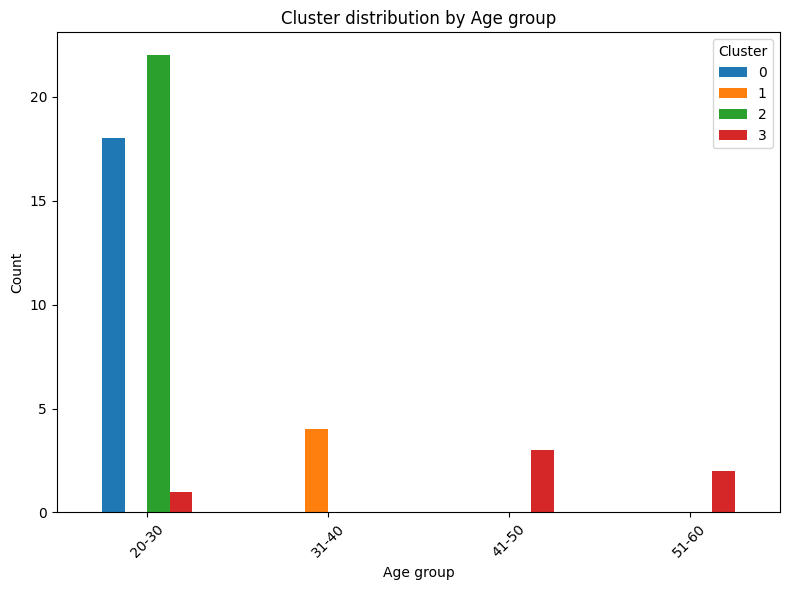

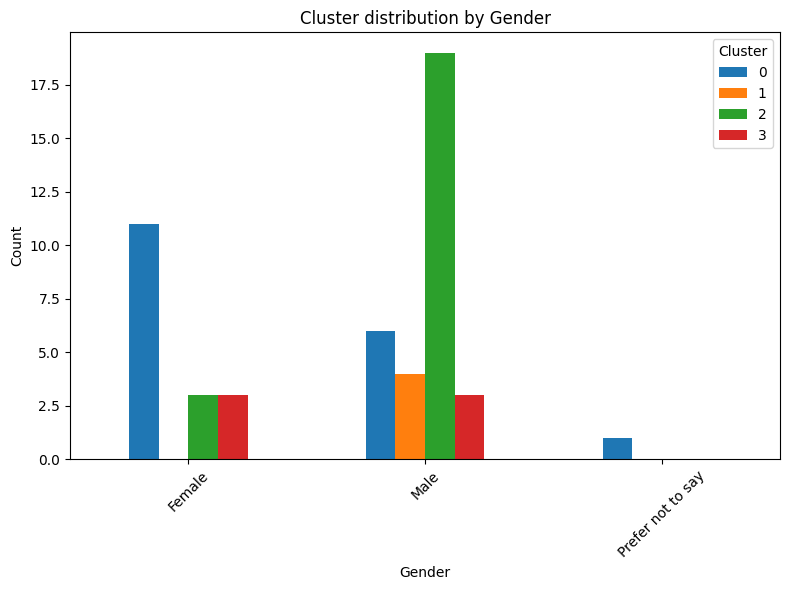

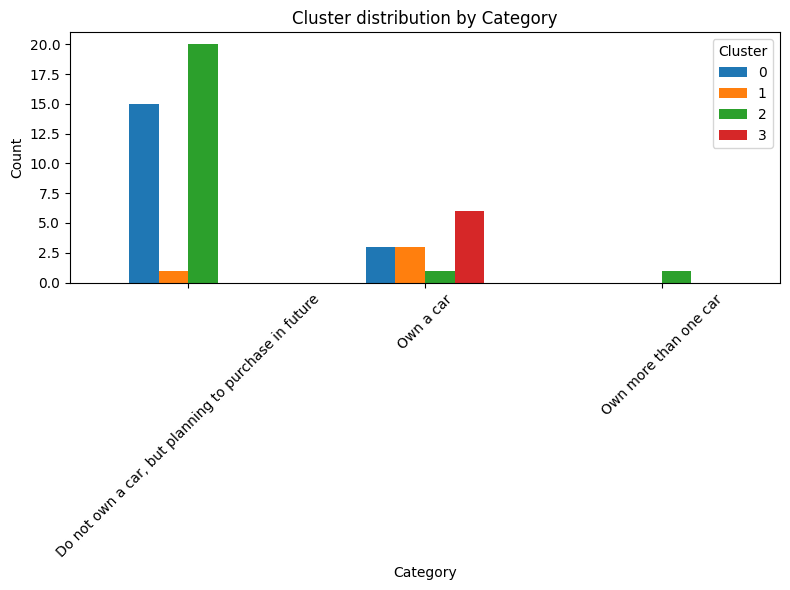

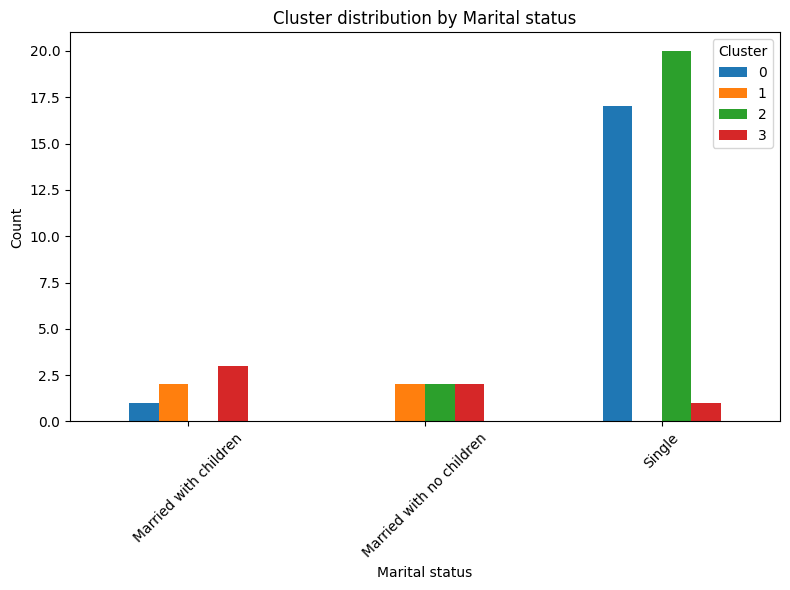

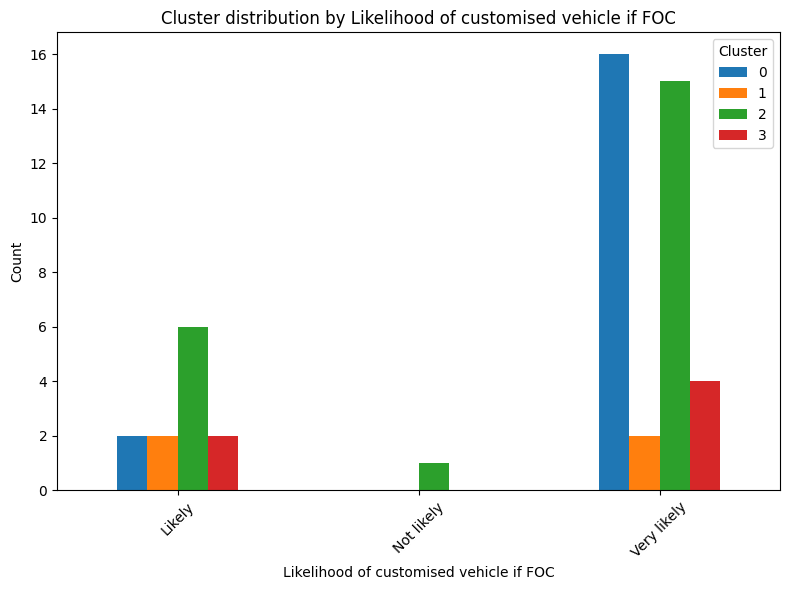

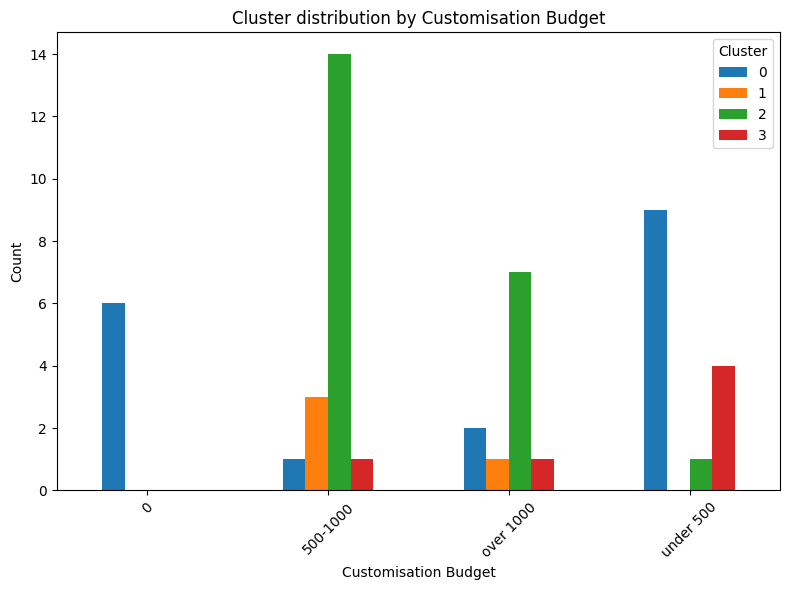

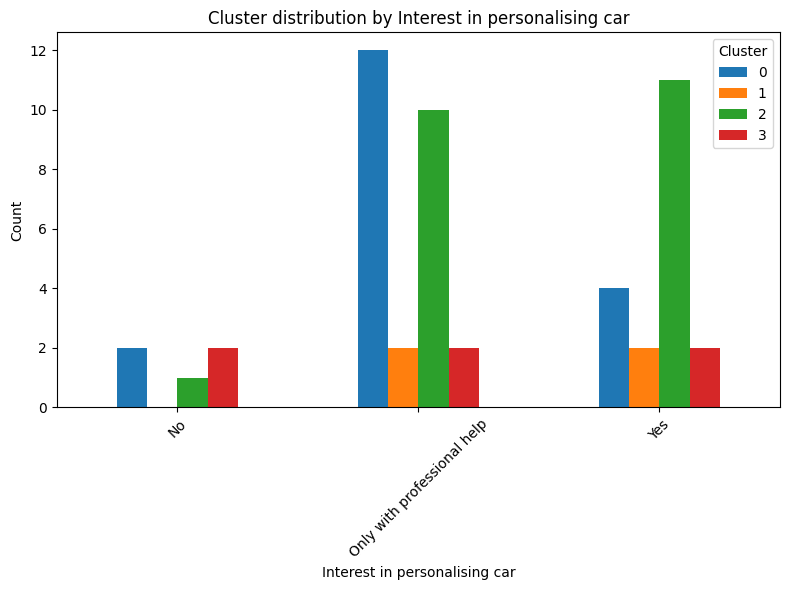

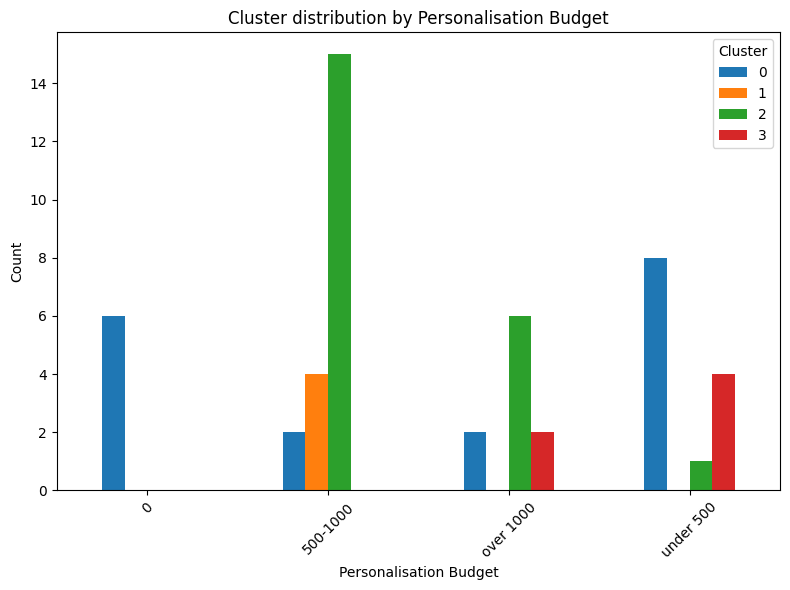

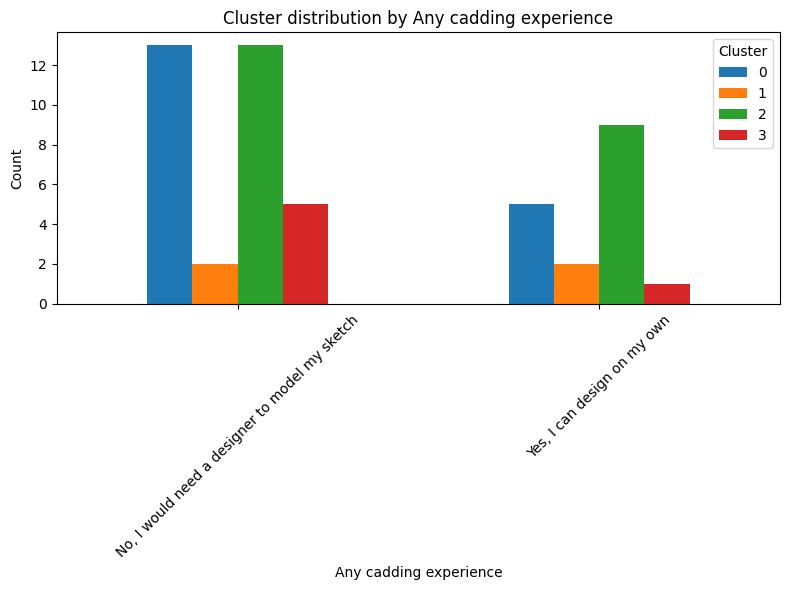

C:\Users\Raize\AppData\Local\Temp\ipykernel_16520\4242490147.py:74: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


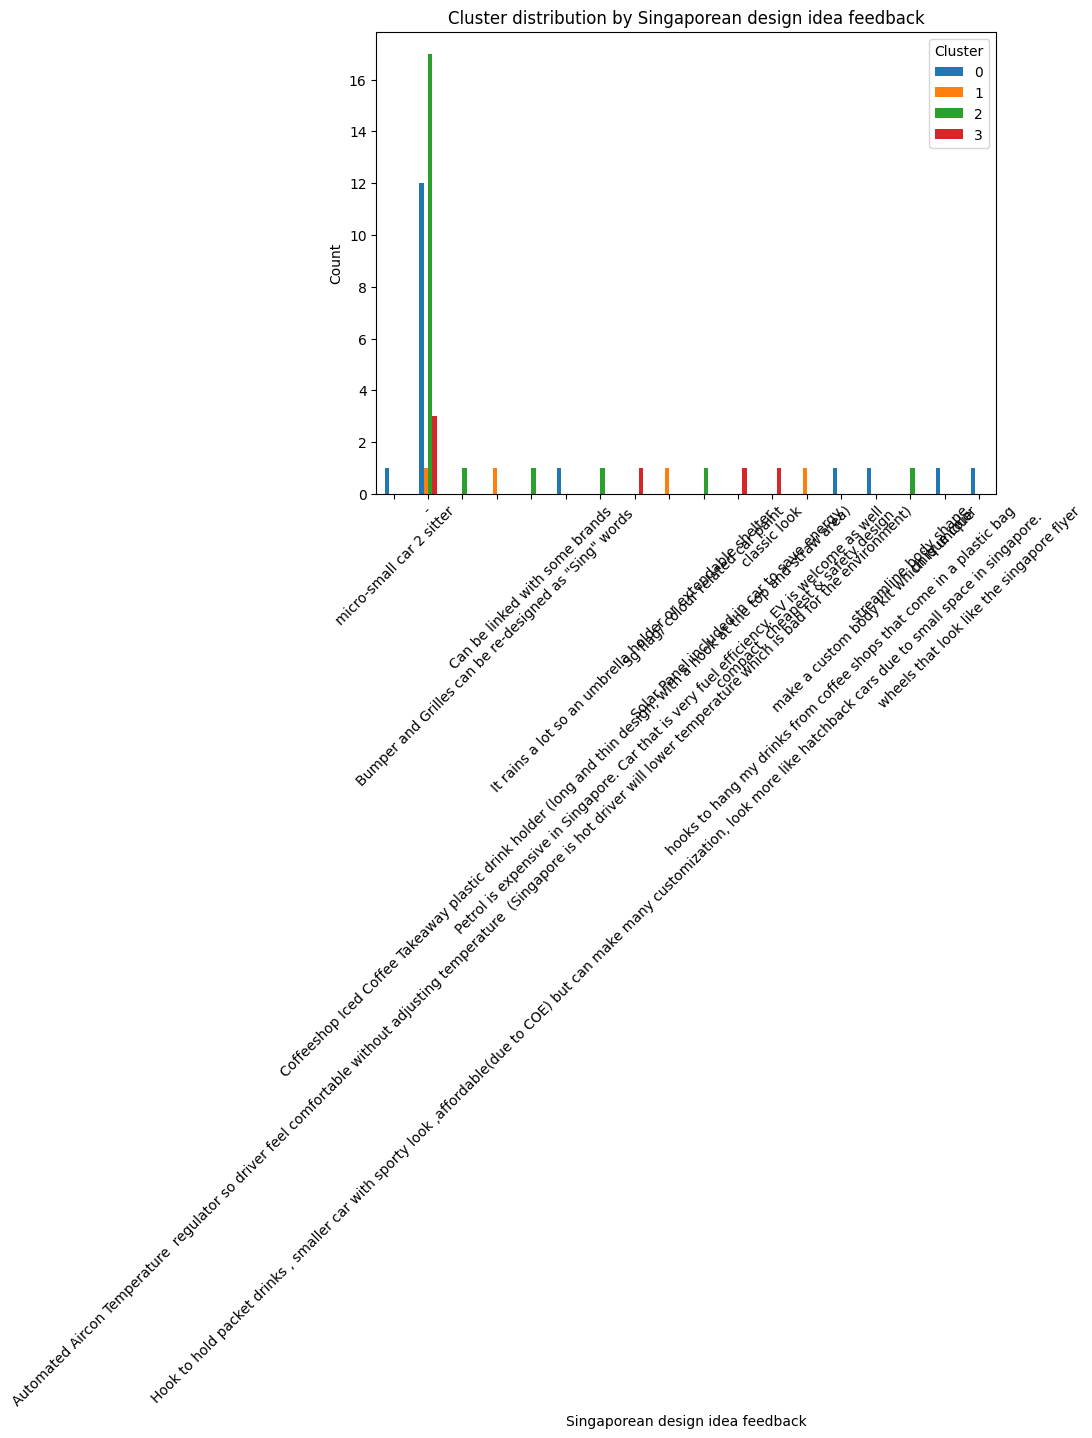

Chi-Square Test Results:
Age group: p-value = 1.2054092716569457e-15
Gender: p-value = 0.01656335756064339
Category: p-value = 5.920846311241283e-05
Marital status: p-value = 1.654377144720413e-05
Likelihood of customised vehicle if FOC: p-value = 0.5494568367994943
Customisation Budget: p-value = 5.057555045231779e-05
Interest in personalising car: p-value = 0.2475359328042174
Personalisation Budget: p-value = 1.8908885998612065e-05
Any cadding experience: p-value = 0.564514608688899
Singaporean design idea feedback: p-value = 0.015354832623652663


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prince import MCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('../data/cleaned_data.csv')

categorical_cols = mca_cols

print(f"MCA FACTORS: {categorical_cols}")
print("=====================================", end='\n\n')

# Apply LabelEncoder
# le = LabelEncoder()
# for col in categorical_cols:
#     df[col] = le.fit_transform(df[col])
#     print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Extract categorical columns for MCA
data_for_mca = df[categorical_cols]
# Perform MCA
mca = MCA(n_components=2)
mca.fit(data_for_mca)
X_mca = mca.transform(data_for_mca)


# Elbow plot to determine the optimal number of clusters
inertia_values = []
for i in range(1, 11):  # Trying clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_mca)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow plot
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.show()

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_mca)

# MCA plot with clusters
plt.scatter(X_mca.iloc[:, 0], X_mca.iloc[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('MCA Component 1')
plt.ylabel('MCA Component 2')
plt.title('MCA of Categorical Data with Color-Coded Clusters')
plt.colorbar(label='Cluster')
plt.show()

def single_mode(series):
    return series.mode()[0]

# Cluster profiles
df['MCA1'] = X_mca.iloc[:, 0]
df['MCA2'] = X_mca.iloc[:, 1]
cluster_profiles = df.groupby('Cluster')[categorical_cols].agg(single_mode)
print("Cluster Profiles:")
print(cluster_profiles)

# Visualize cluster distributions for each categorical column
for col in categorical_cols:
    pd.crosstab(df[col], df['Cluster']).plot(kind='bar', figsize=(8, 6))
    plt.title(f'Cluster distribution by {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

# Chi-Square Test
print("Chi-Square Test Results:")
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Cluster'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: p-value = {p}")

<p>The analysis includes categorical data transformation, dimensionality reduction using Multiple Correspondence Analysis (MCA), clustering using KMeans, and evaluation of the resulting clusters. Here's what each cluster plot and component means:

1. **Elbow Plot for Optimal Number of Clusters**: This plot helps in determining the optimal number of clusters (k) for KMeans clustering. It plots the within-cluster sum of squares (inertia) against the number of clusters. The "elbow" point, where the rate of decrease sharply changes, suggests the optimal number of clusters. In this case, an elbow plot determines how many clusters best represent the variation within the MCA-transformed data.

2. **MCA of Categorical Data with Color-Coded Clusters**: After transforming the categorical data into two-dimensional space using MCA, this scatter plot visualizes the distribution of the data points (respondents) in this lower-dimensional space. Each point represents a respondent, and its color represents the cluster assigned by the KMeans algorithm. This plot provides a visual overview of how well the respondents are grouped based on their categorical answers in the MCA transformed space.

3. **Cluster Profiles**: This segment doesn't produce a plot but rather a summary table that describes each cluster's modal (most common) value across all categorical variables. It helps in interpreting what characterizes each cluster, essentially creating a "profile" for the respondents grouped within.

4. **Cluster Distribution by Each Categorical Column**: For each categorical column, a bar plot shows how many respondents from each cluster fall under each category within that variable. These plots are crucial for understanding how each cluster differs in terms of the variables considered. They provide detailed insights into the preferences or characteristics that define each cluster.

5. **Chi-Square Test Results**: While not a plot, this component involves performing a Chi-Square test for independence between each categorical variable and the cluster assignments. The p-values help determine whether the distribution of responses within each categorical variable significantly differs across clusters. A low p-value (<0.05) suggests that there is a significant association between the variable and the cluster assignments, indicating that the variable contributes meaningfully to the differences between clusters.

Each plot and component in this analysis contributes to understanding how respondents can be grouped based on their preferences related to car customization, and what characterizes each group, based on responses to a set of categorical questions.</p>